# **1. Perkenalan Dataset**


Dataset mencakup profil pasien dengan beragam fitur yang mencerminkan demografi, kebiasaan gaya hidup, riwayat keluarga, serta pengukuran klinis yang diakui sebagai indikator penting risiko Dataset telah melalui proses **pembersihan** dan **pra-pemrosesan**, sehingga siap digunakan untuk berbagai tujuan seperti klasifikasi, regresi, rekayasa fitur, analisis statistik, dan visualisasi data.diabetes. Semua data dihasilkan menggunakan distribusi statistik yang didasarkan pada penelitian medis dunia nyata, sehingga menjamin privasi sekaligus tetap mencerminkan pola kesehatan yang realistis.

Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [19]:
path ="/content/diabetes_dataset.csv"
df = pd.read_csv(path)
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [21]:
df.isnull().sum()

,0
age,0
gender,0
ethnicity,0
education_level,0
income_level,0
employment_status,0
smoking_status,0
alcohol_consumption_per_week,0
physical_activity_minutes_per_week,0
diet_score,0


In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.describe()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,0.219410,0.250800,0.079200,25.612653,...,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362,0.599980
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,0.413849,0.433476,0.270052,3.586705,...,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505,0.489904
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,...,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000,0.000000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,...,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000,0.000000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,...,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000,1.000000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,...,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000,1.000000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.200000,...,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,67.200000,1.000000


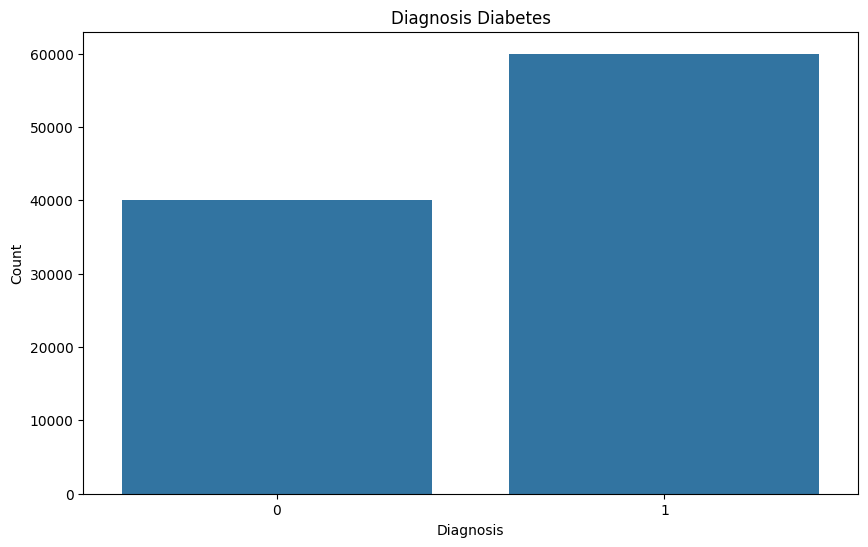

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='diagnosed_diabetes',data=df)
plt.title('Diagnosis Diabetes')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

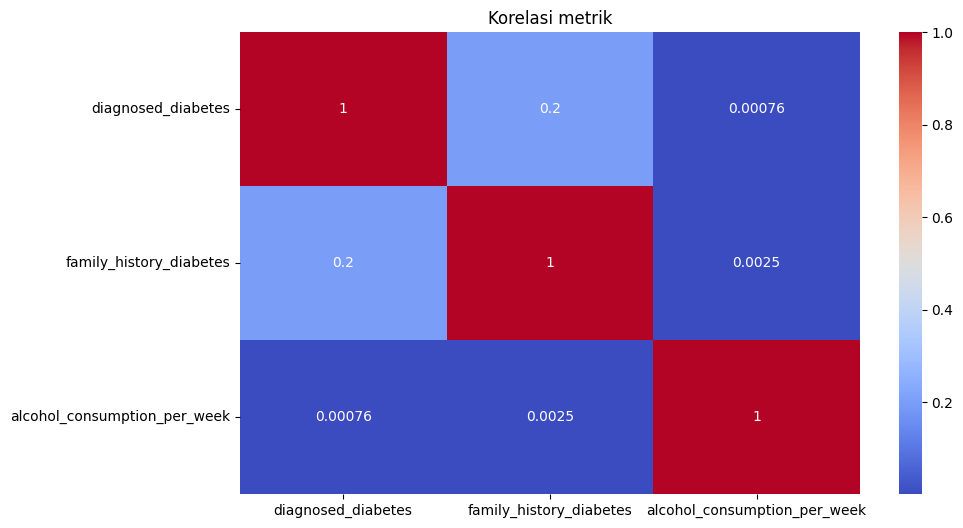

In [25]:
#korelasi antar skor
plt.figure(figsize=(10, 6))
sns.heatmap(df[['diagnosed_diabetes','family_history_diabetes','alcohol_consumption_per_week']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi metrik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [26]:
#encode data kategorikal
cat_cols =['gender','ethnicity','education_level','income_level','employment_status','smoking_status','diabetes_stage']
df_encoded = df.copy()
le = LabelEncoder()
for col in cat_cols:
  df_encoded[col] = le.fit_transform(df_encoded[col])

In [27]:
#Normalisasi fitur numerik
scaler = StandardScaler()
num_cols = ['age','alcohol_consumption_per_week','physical_activity_minutes_per_week','diet_score',
            'sleep_hours_per_day','screen_time_hours_per_day','family_history_diabetes','hypertension_history',
            'cardiovascular_history','bmi','waist_to_hip_ratio','systolic_bp','diastolic_bp','heart_rate',
            'cholesterol_total','hdl_cholesterol','ldl_cholesterol','triglycerides','glucose_fasting',
            'glucose_postprandial','insulin_level','hba1c','diabetes_risk_score'
            ]
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])
print(df_encoded.head())

        age  gender  ethnicity  education_level  income_level  \
0  0.504956       1          0                1             2   
1 -0.135884       0          4                1             3   
2  0.633124       1          2                1             3   
3  1.530299       0          1                1             1   
4 -0.264052       1          4                0             3   

   employment_status  smoking_status  alcohol_consumption_per_week  \
0                  0               2                     -1.413253   
1                  0               1                     -0.707921   
2                  3               2                     -0.707921   
3                  1               2                     -1.413253   
4                  1               2                     -0.707921   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                            1.138363   -0.165523  ...        -1.270320   
1                            0.285376 

In [28]:
train_df, test_df = train_test_split(df_encoded, test_size=0.2, random_state=42)
train_df.to_csv('train_df.csv', index=False)
test_df.to_csv('test_df.csv', index=False)

print("\nJumlah data latih:", len(train_df))
print("Jumlah data uji:", len(test_df))


Jumlah data latih: 80000
Jumlah data uji: 20000
